## Exploring the sample data to be sent to Livepeer SAM2 API

In [1]:
# Importing packages
import cv2
import numpy as np
import pickle
from PIL import Image

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load pickle files (point_coords and bbox)
with open("example_data/bbox_snippet.pkl", "rb") as f:
    bbox_xyxys = pickle.load(f)

with open("example_data/point_coords_snippet.pkl", "rb") as f:
    point_coords = pickle.load(f)

In [3]:
# Set image idx here
image_idx = 2

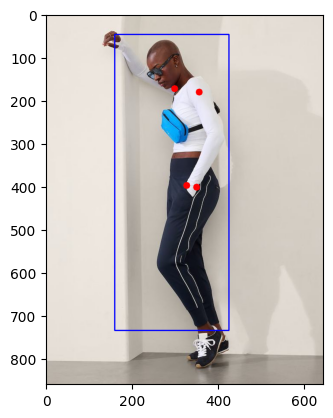

In [4]:
image_pil = Image.open(f"example_data/images/{image_idx}.jpg")
opencv_image = cv2.cvtColor(np.array(image_pil), cv2.COLOR_RGB2BGR)

bbox_xyxy = bbox_xyxys[image_idx]
image = cv2.rectangle(
    opencv_image, 
    [bbox_xyxy[0], bbox_xyxy[1]], 
    [bbox_xyxy[2], bbox_xyxy[3]], 
    (255, 0, 0), 
    2
)

# Add keypoints to image
for keypoint in point_coords[image_idx]:
    image = cv2.circle(image, keypoint, radius=8, color=(0, 0, 255), thickness=-1)
    
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()